# BMI Predction - Explorotary Data Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.insert(0, '../')

from src.rules_engine import prepare_data

In [4]:
dummy_data = pd.read_csv('../data/raw/Dummy-Data.csv')
dummy_data.head()

,AppID,Ins_Age,Ins_Gender,Ht,Wt,IssueDate
0,56372,31,Male,510,185,NaN
1,34565,35,Male,510,205,NaN
2,57732,45,Female,510,125,NaN
3,87324,38,Male,503,175,NaN
4,12323,39,Female,600,252,NaN


## Calculating BMI and Quote According to Business Rules

In [5]:
dummy_data_processed = prepare_data(dummy_data)
dummy_data_processed.head()

,AppID,Ins_Age,Ins_Gender,Ht,Wt,IssueDate,BMI,Quote,Reason
0,56372,31,Male,510,185,NaN,26.544442,500.0,BMI is in right range
1,34565,35,Male,510,205,NaN,29.414111,500.0,BMI is in right range
2,57732,45,Female,510,125,NaN,17.935434,900.0,Age is between 40 to 59 and BMI is either less...
3,87324,38,Male,503,175,NaN,30.999515,500.0,BMI is in right range
4,12323,39,Female,600,252,NaN,34.176966,450.0,BMI is in right range


In [6]:
print(dummy_data_processed.describe())

               AppID     Ins_Age          Ht         Wt  IssueDate  \
count     100.000000  100.000000  100.000000  100.00000        0.0   
mean    79455.570000   37.320000  527.720000  165.15000        NaN   
std     31123.726942   12.103827   39.482787   27.66224        NaN   
min     12123.000000   19.000000  500.000000  110.00000        NaN   
25%     64296.000000   27.750000  506.000000  145.00000        NaN   
50%     99444.500000   36.000000  509.000000  170.00000        NaN   
75%     99917.000000   47.000000  511.000000  180.00000        NaN   
max    100345.000000   59.000000  605.000000  275.00000        NaN   

              BMI        Quote  
count  100.000000   100.000000  
mean    25.083218   528.750000  
std      4.930689   133.445739  
min     15.406918   450.000000  
25%     22.084394   450.000000  
50%     25.087886   500.000000  
75%     28.263584   500.000000  
max     39.457954  1000.000000  


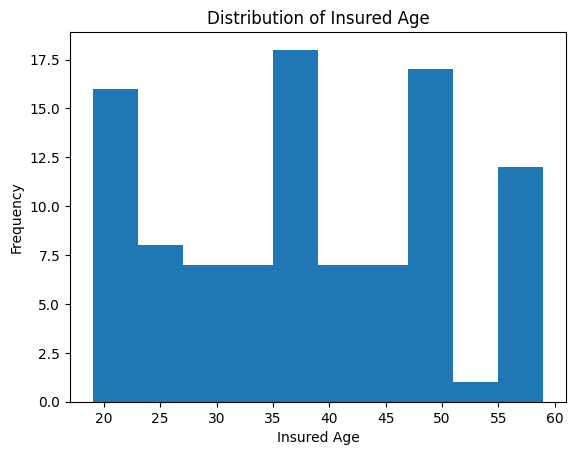

In [7]:
# Plot a histogram of the 'Ins_Age' column
plt.hist(dummy_data['Ins_Age'])
plt.xlabel('Insured Age')
plt.ylabel('Frequency')
plt.title('Distribution of Insured Age')
plt.show()


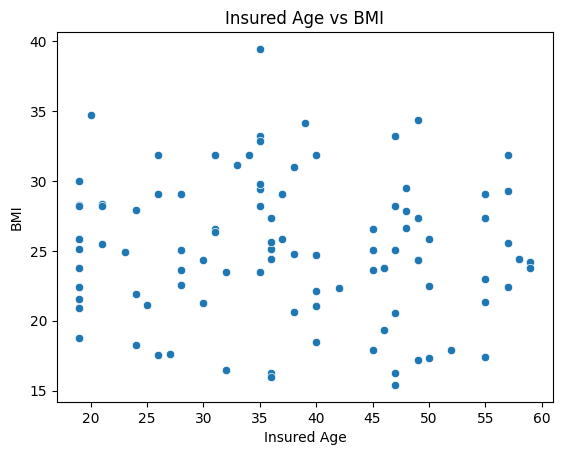

In [8]:
# Plot a scatter plot of 'Ins_Age' vs 'BMI'
sns.scatterplot(data=dummy_data, x='Ins_Age', y='BMI')
plt.xlabel('Insured Age')
plt.ylabel('BMI')
plt.title('Insured Age vs BMI')
plt.show()

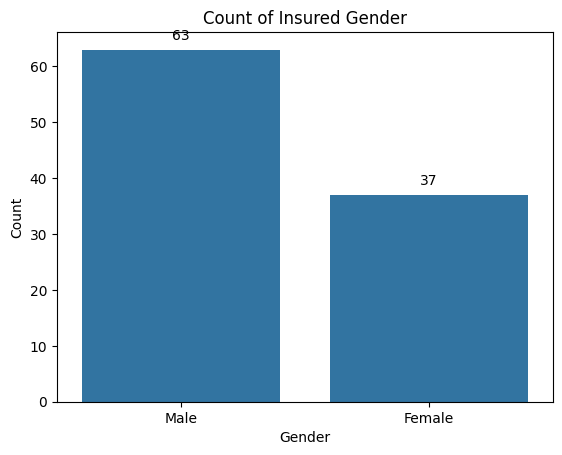

In [9]:
ax = sns.countplot(data=dummy_data, x='Ins_Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Insured Gender')

# Display count numbers on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

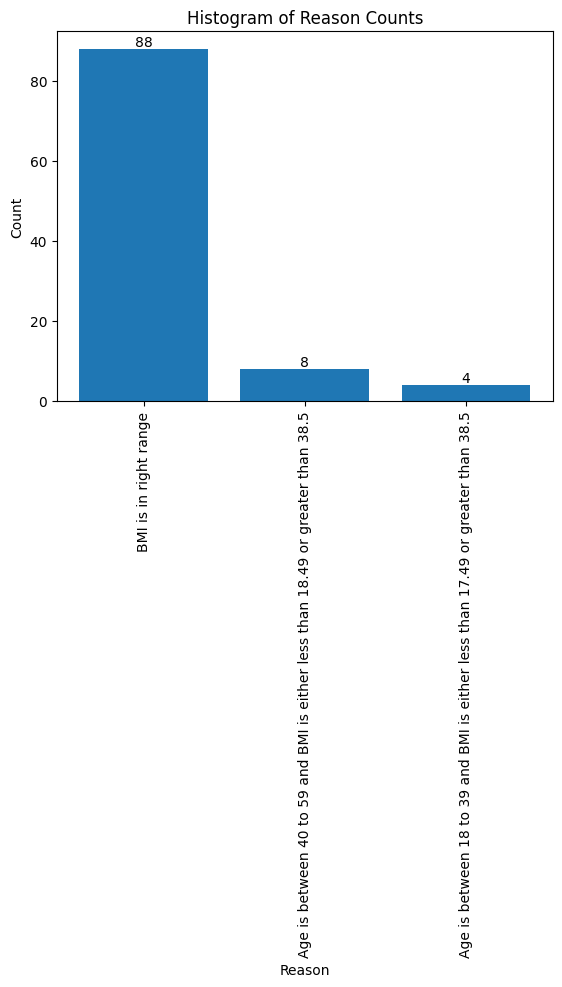

In [12]:
reason_counts = dummy_data_processed['Reason'].value_counts()

plt.bar(reason_counts.index, reason_counts.values)
plt.xlabel('Reason')
plt.ylabel('Count')
plt.title('Histogram of Reason Counts')
plt.xticks(rotation=90)

# Add labels to the bars
for i, count in enumerate(reason_counts.values):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')

plt.show()

# Processed Data

In [16]:
processed_data = pd.read_csv('../data/processed/Dummy-Data.csv')

processed_data.head()


,AppID,Ins_Age,Ins_Gender,Ht,Wt,BMI,Quote,Reason
0,56372.0,31.0,1.0,510.0,185.0,26.544442,500,BMI is in right range
1,34565.0,35.0,1.0,510.0,205.0,29.414111,500,BMI is in right range
2,57732.0,45.0,0.0,510.0,125.0,17.935434,1000,Age is between 40 to 59 and BMI is either less...
3,87324.0,38.0,1.0,503.0,175.0,30.999515,500,BMI is in right range
4,12323.0,39.0,0.0,600.0,252.0,34.176966,500,BMI is in right range


In [17]:
processed_data.describe()

,AppID,Ins_Age,Ins_Gender,Ht,Wt,BMI,Quote
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,77259.263397,40.000622,0.593119,543.305918,152.628496,19.125196,736.742424
std,28453.107759,9.730250,0.437386,40.918202,39.327186,7.269799,212.074656
min,12123.000000,19.000000,0.000000,500.000000,110.000000,3.446281,500.000000
25%,54740.074717,34.578416,0.000000,509.555175,121.914473,16.239883,500.000000
50%,93588.500000,36.000000,0.756107,511.526948,133.786274,17.431119,750.000000
75%,99531.674184,48.903751,1.000000,600.088435,180.000000,24.327647,1000.000000
max,100345.000000,59.000000,1.000000,605.000000,275.000000,39.457954,1000.000000


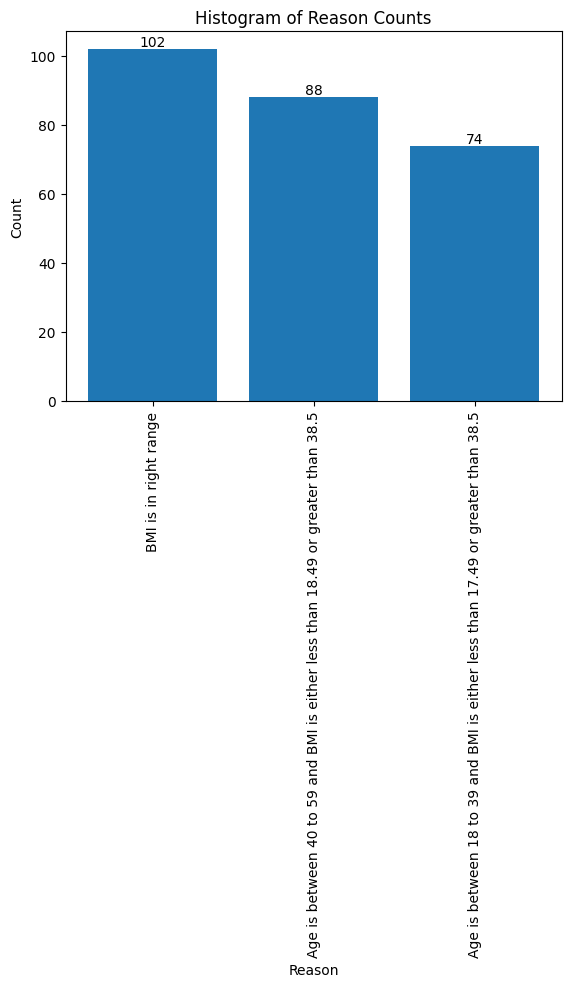

In [19]:
reason_counts = processed_data['Reason'].value_counts()

plt.bar(reason_counts.index, reason_counts.values)
plt.xlabel('Reason')
plt.ylabel('Count')
plt.title('Histogram of Reason Counts')
plt.xticks(rotation=90)

# Add labels to the bars
for i, count in enumerate(reason_counts.values):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')

plt.show()